# Spatio-Temporal Receptive Field Animations

This notebook generates animations showing:
1. Spatial receptive fields (Gaussian convolution)
2. Temporal receptive fields (Exponential convolution with causality)

In [2]:
import scipy.stats
import scipy.integrate
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

DPI = 150

## Spatial Receptive Fields

For spatial receptive fields, we use Gaussian kernels:

$$(g * f)(x) = \int_{u \in \mathbb{R}^n} g(u) \, f(x - u) \, du$$

In [3]:
def showSpatialConvolution(x0, f, g, xlim=5, ylim1=1.5, ylim2=1.0):
    """Show spatial convolution with Gaussian kernel"""
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(x))
    for n, x_ in enumerate(x):
        prod = lambda u: f(u) * g(x_ - u)
        convolution[n] = scipy.integrate.simpson(prod(x), x=x)

    # Create the shifted function
    g_shift = lambda u: g(x0 - u)
    prod = lambda u: f(u) * g(x0 - u)

    # Plot the curves
    plt.gcf().clear()

    # Top panel: convolution integrand
    plt.subplot(211)
    plt.gca().set_ylim(-0.05, ylim1)
    plt.plot(x, f(x), label=r'Signal $f(u)$', linewidth=2)
    plt.plot(x, g_shift(x), label=r'Kernel $g(x_0-u)$', linewidth=2)
    plt.fill(x, prod(x), color='red', alpha=0.3, edgecolor='darkred', hatch='//', linewidth=1)
    plt.plot(x, prod(x), 'r-', label=r'Product $f(u)g(x_0-u)$', linewidth=2)
    plt.text(-xlim + 0.5, ylim1 * 0.85, f'$x_0={x0:.2f}$', 
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=1.5),
             fontsize=12, fontweight='bold')

    plt.grid(True, alpha=0.3)
    plt.xlabel(r'Position $u$', fontsize=12)
    plt.ylabel(r'Amplitude', fontsize=12)
    plt.legend(fontsize=11, loc="upper right", framealpha=0.95)
    plt.xlim(-xlim, xlim)
    
    # Bottom panel: convolution result
    plt.subplot(212)
    plt.gca().set_ylim(-0.05, ylim2)
    plt.plot(x, convolution, label=r'$(g * f)(x)$', linewidth=2.5, color='darkblue')

    # Calculate and plot current value
    current_value = scipy.integrate.simpson(prod(x), x=x)
    plt.plot(x0, current_value, 'ro', markersize=10, markeredgecolor='darkred', markeredgewidth=2)
    
    plt.grid(True, alpha=0.3)
    plt.xlabel(r'Position $x$', fontsize=12)
    plt.ylabel(r'$(g * f)(x)$', fontsize=12)
    plt.legend(fontsize=11, framealpha=0.95)
    plt.xlim(-xlim, xlim)
    
    plt.tight_layout()

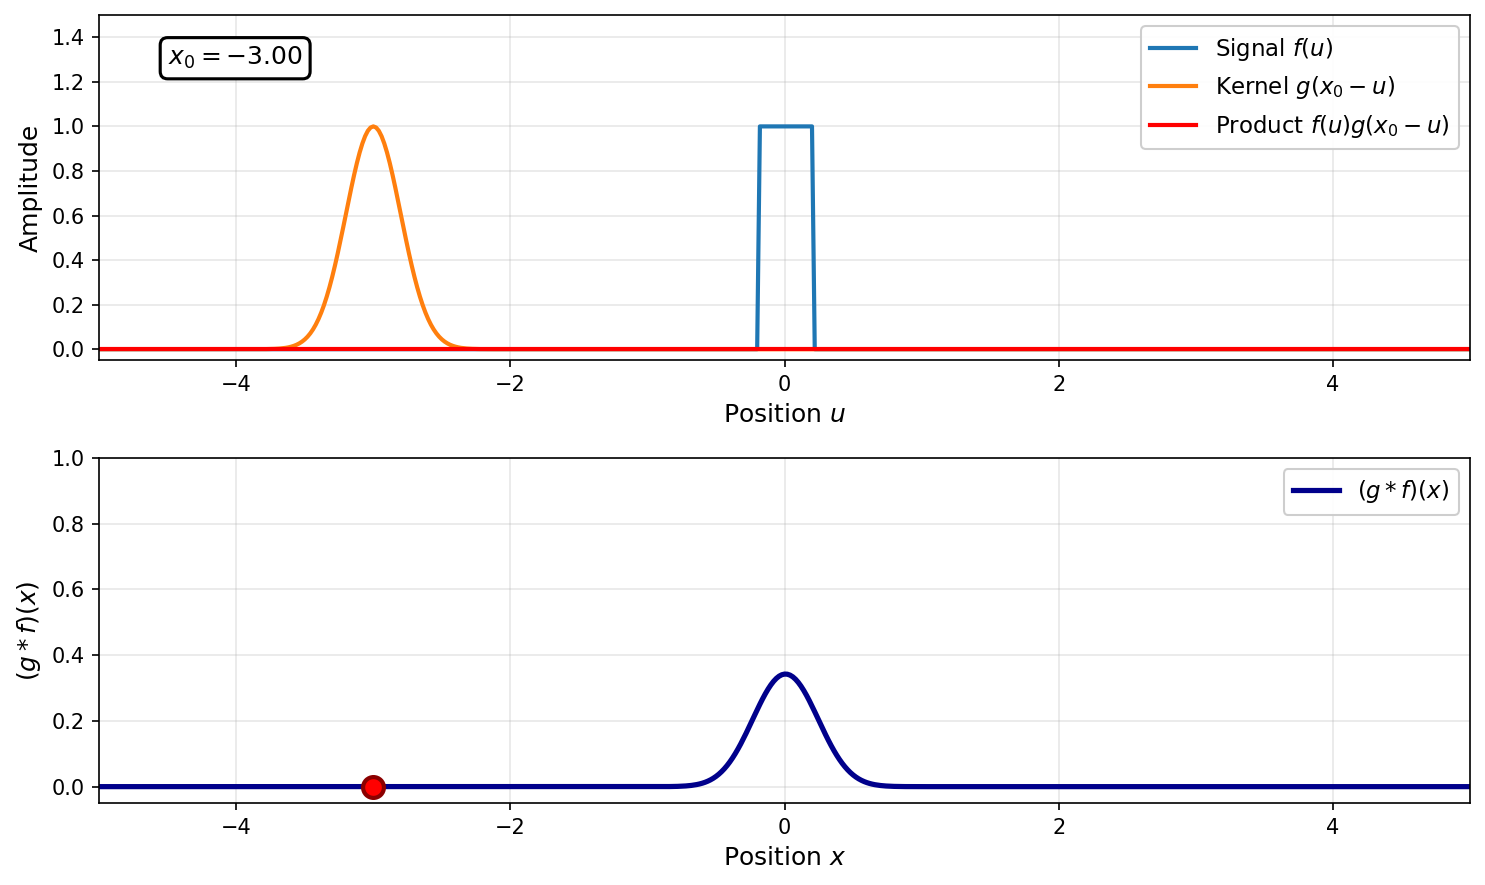

In [21]:
# Setup for spatial convolution
Fs = 50
xlim = 5
x = np.arange(-xlim, xlim + 1/Fs, 1/Fs)

# Input signal (narrow pulse)
f_spatial = lambda u: (u > -0.2) * (u < 0.2)

# Gaussian kernel g(u) with standard deviation σ
sigma = 0.2
g_spatial = lambda u: scipy.stats.norm.pdf(u, scale=sigma) * sigma * np.sqrt(2 * np.pi)

x0_frames = np.arange(-3.0, 3.5, 0.05)

fig = plt.figure(figsize=(10, 6), dpi=DPI)
anim_spatial = animation.FuncAnimation(
    fig, 
    showSpatialConvolution, 
    frames=x0_frames, 
    fargs=(f_spatial, g_spatial, xlim, 1.5, 1.0),
    interval=80
)

anim_spatial.save('spatial_gaussian_narrow.mp4', fps=20, dpi=DPI, bitrate=2000)

## Temporal Receptive Fields

For temporal receptive fields, we use exponentially truncated kernels with causality:

$$(h * f)(t) = \int_{u=0}^\infty h(u) f(t - u) du$$

where 

$$h(t; \mu) = \begin{cases} \mu^{-1}\exp(-t/\mu) & t > 0 \\\\ 0 & t \leq 0 \end{cases}$$

In [24]:
def showTemporalConvolution(t0, f, h, mu, tlim=5, ylim1=1.2, ylim2=0.6):
    """Show temporal convolution with exponential kernel (causal)"""
    # Calculate the overall convolution result
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda u: f(u) * h(t_ - u)
        convolution[n] = scipy.integrate.simpson(prod(t), t)

    # Create the shifted and flipped function
    h_shift = lambda u: h(t0 - u)
    prod = lambda u: f(u) * h(t0 - u)

    # Plot the curves
    plt.gcf().clear()

    # Top panel: convolution integrand
    plt.subplot(211)
    plt.gca().set_ylim(-0.05, ylim1)
    plt.plot(t, f(t), label=r'Signal $f(u)$', linewidth=2)
    plt.plot(t, h_shift(t), label=r'Kernel $h(t_0-u; \mu)$', linewidth=2)
    plt.fill(t, prod(t), color='red', alpha=0.3, edgecolor='darkred', hatch='//', linewidth=1)
    plt.plot(t, prod(t), 'r-', label=r'Product $f(u)h(t_0-u; \mu)$', linewidth=2)
    plt.text(-tlim + 0.5, ylim1 * 0.85, 
             f'$t_0={t0:.2f}$\n$\\mu={mu:.2f}$', 
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=1.5),
             fontsize=12, fontweight='bold')

    plt.grid(True, alpha=0.3)
    plt.xlabel(r'Time $u$', fontsize=12)
    plt.ylabel(r'Amplitude', fontsize=12)
    plt.legend(fontsize=11, loc="upper right", framealpha=0.95)
    plt.xlim(-tlim, tlim)
    
    # Bottom panel: convolution result
    plt.subplot(212)
    plt.gca().set_ylim(-0.05, ylim2)
    plt.plot(t, convolution, label=r'$(h * f)(t)$', linewidth=2.5, color='darkblue')

    # Calculate and plot current value
    current_value = scipy.integrate.simpson(prod(t), t)
    plt.plot(t0, current_value, 'ro', markersize=10, markeredgecolor='darkred', markeredgewidth=2)
    
    plt.grid(True, alpha=0.3)
    plt.xlabel(r'Time $t$', fontsize=12)
    plt.ylabel(r'$(h * f)(t)$', fontsize=12)
    plt.legend(fontsize=11, framealpha=0.95)
    plt.xlim(-tlim, tlim)
    
    plt.tight_layout()

Saved temporal_fast.mp4


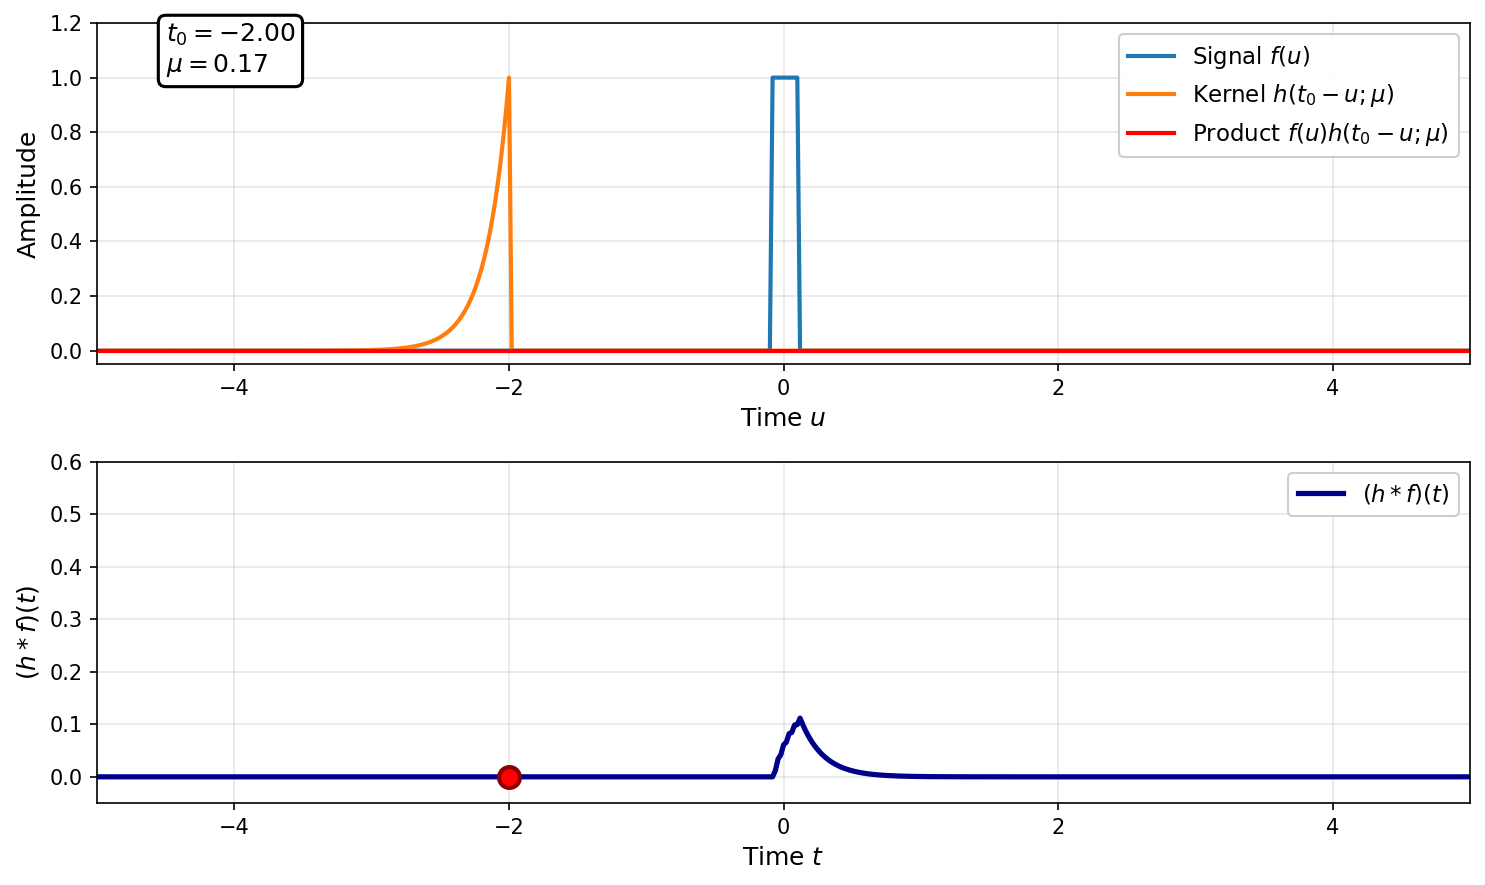

In [35]:
# Setup for temporal convolution - fast decay
Fs = 50
tlim = 5
t = np.arange(-tlim, tlim + 1/Fs, 1/Fs)

# Input signal (spike/pulse)
f_temporal = lambda t: (t > -0.1) * (t < 0.1)

# Exponential kernel h(t; μ) - fast decay
mu_fast = 1.0 / 6.0  # Time constant
h_fast = lambda t: (t > 0) * (1/mu_fast) * np.exp(-t / mu_fast) * mu_fast

t0_frames = np.arange(-2.0, 2.5, 0.02)

fig = plt.figure(figsize=(10, 6), dpi=DPI)
anim_temporal_fast = animation.FuncAnimation(
    fig, 
    showTemporalConvolution, 
    frames=t0_frames, 
    fargs=(f_temporal, h_fast, mu_fast, tlim, 1.2, 0.6),
    interval=80
)

anim_temporal_fast.save('temporal_fast.mp4', fps=20, dpi=DPI, bitrate=2000)
print("Saved temporal_fast.mp4")

Saved temporal_slow.mp4


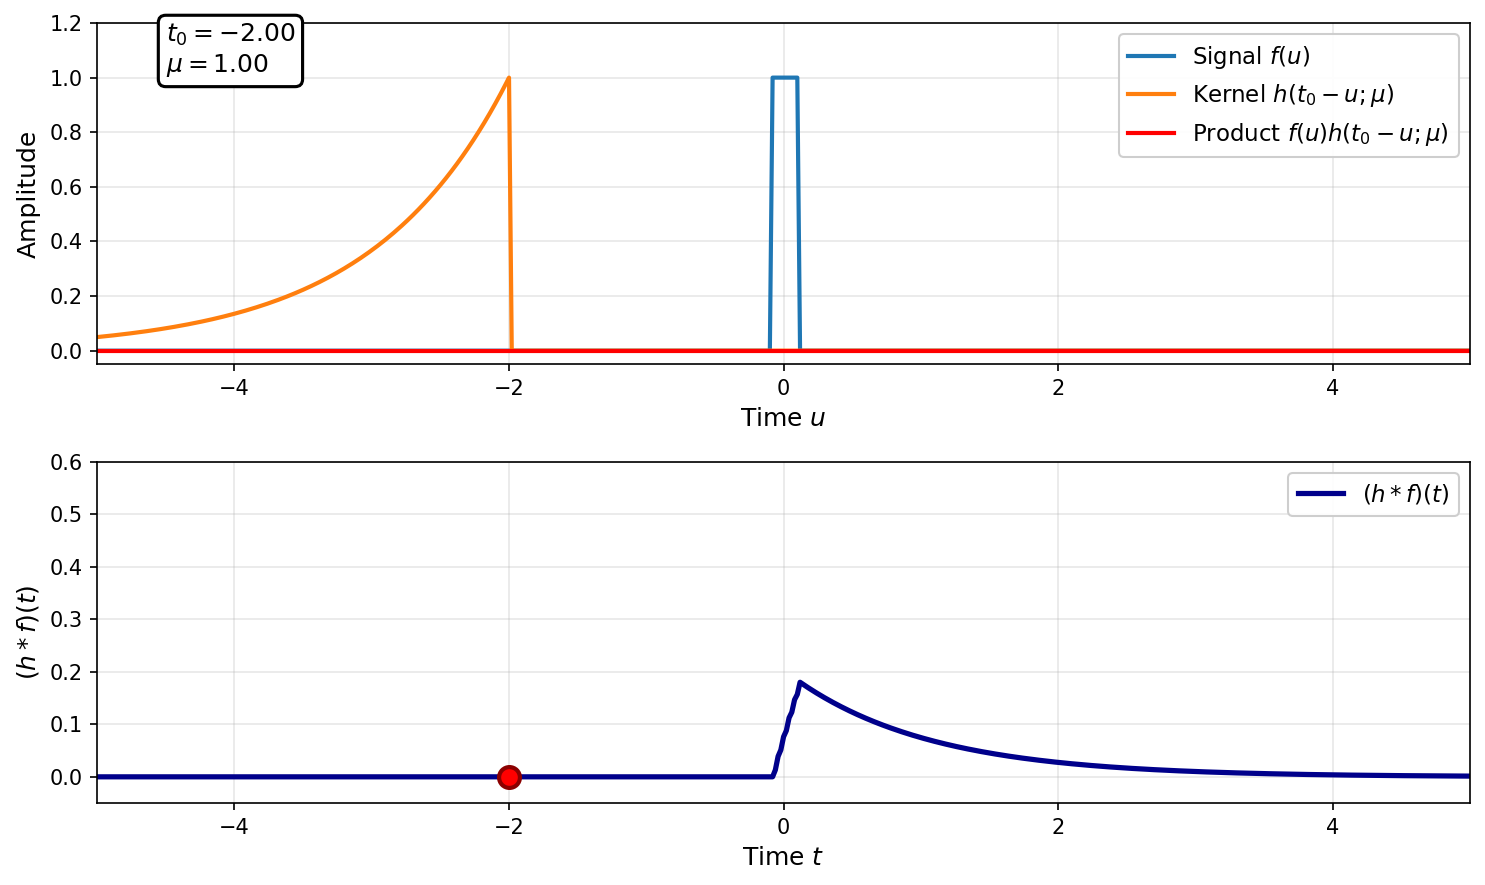

In [ ]:
# Setup for temporal convolution - slow decay
mu_slow = 1.0  # Larger time constant = slower decay
h_slow = lambda t: (t > 0) * (1/mu_slow) * np.exp(-t / mu_slow) * mu_slow

fig = plt.figure(figsize=(10, 6), dpi=DPI)
anim_temporal_slow = animation.FuncAnimation(
    fig, 
    showTemporalConvolution, 
    frames=t0_frames, 
    fargs=(f_temporal, h_slow, mu_slow, tlim, 1.2, 0.6),
    interval=80
)

anim_temporal_slow.save('temporal_slow.mp4', fps=20, dpi=DPI, bitrate=2000)
print("Saved temporal_slow.mp4")

## Summary

Generated animations:
- `spatial_gaussian.mp4`: Spatial receptive field with Gaussian kernel
- `temporal_fast.mp4`: Temporal receptive field with fast exponential decay (μ=1/6)
- `temporal_slow.mp4`: Temporal receptive field with slow exponential decay (μ=1)

Saved temporal_multiscale.png


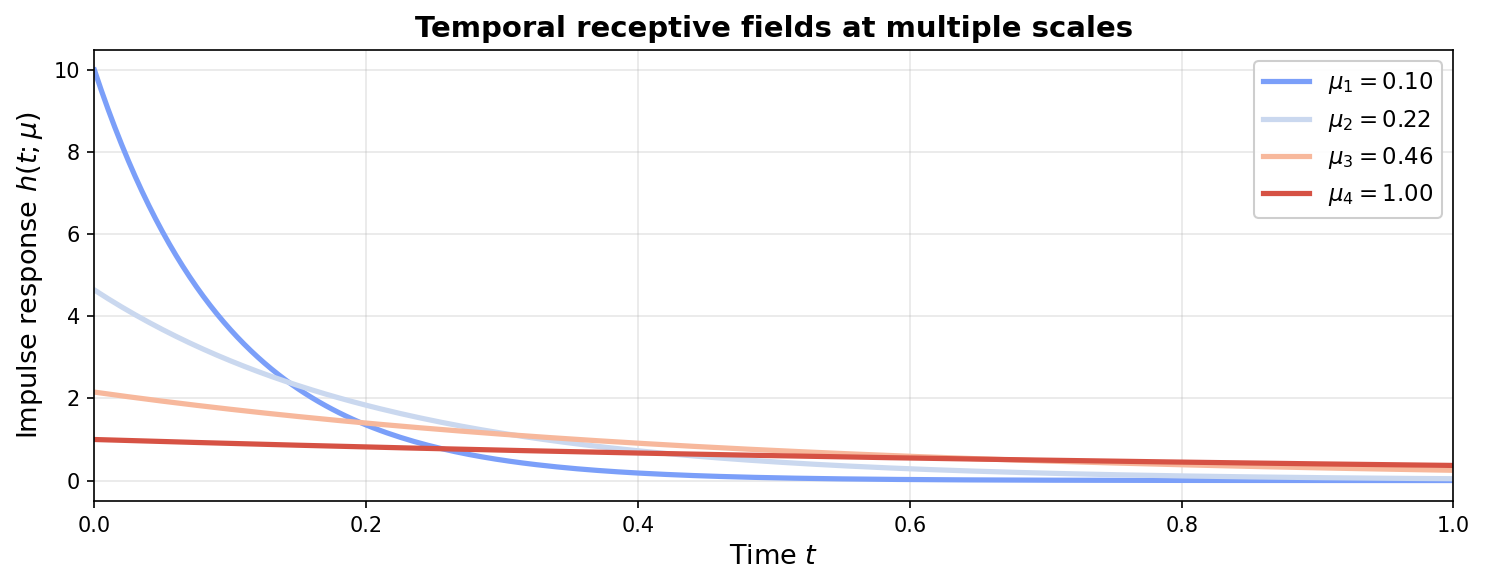

In [48]:
# Multi-scale temporal channels
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), dpi=DPI)

# Time array
t_response = np.linspace(0, 5, 1000)

# Four logarithmically spaced time constants
mu_values = np.logspace(-1, 0, 4)  # From 0.1 to ~5
colors = plt.cm.coolwarm(np.linspace(0.2, 0.9, 4))

# Top panel: Individual impulse responses
for i, (mu, color) in enumerate(zip(mu_values, colors)):
    h = (1/mu) * np.exp(-t_response / mu)
    ax1.plot(t_response, h, linewidth=2.5, color=color, 
             label=f'$\\mu_{i+1} = {mu:.2f}$')

ax1.set_xlabel('Time $t$', fontsize=13)
ax1.set_ylabel('Impulse response $h(t; \\mu)$', fontsize=13)
ax1.set_title('Temporal receptive fields at multiple scales', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11, framealpha=0.95)
ax1.set_xlim(0, 1)

plt.tight_layout()
plt.savefig('temporal_multiscale.png', dpi=DPI, bbox_inches='tight')
print("Saved temporal_multiscale.png")
plt.show()

## Multi-scale Temporal Channels

Showing impulse responses across multiple temporal scales with logarithmically spaced time constants.